In [1]:
# import necessary libraries

import tensorflow as tf
from tensorflow import keras

In [2]:
# create tensor with only 0 and 1

x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


2023-01-02 19:08:51.202511: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-02 19:08:51.202709: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# create tensors with random values

x = tf.random.normal(shape=(3, 1), mean=0.0, stddev=1.0)
print(x)

tf.Tensor(
[[ 0.01271114]
 [-0.372031  ]
 [ 0.7423435 ]], shape=(3, 1), dtype=float32)


##### The line above is the same as:

```py
np.random.normal(size=(3, 1), loc=0., scale=1.)
```

##### in numpy


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0.0, maxval=1.0)
print(x)

tf.Tensor(
[[0.53363585]
 [0.5325005 ]
 [0.25014472]], shape=(3, 1), dtype=float32)


## NumPy vs TensorFlow:
TensorFlow's tensors are constant, which means they are immutable and vice versa for NumPy.

### Linear Classification

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

In [5]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np. float32)

In [6]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"), 
                     np.ones((num_samples_per_class, 1), dtype = "float32")))

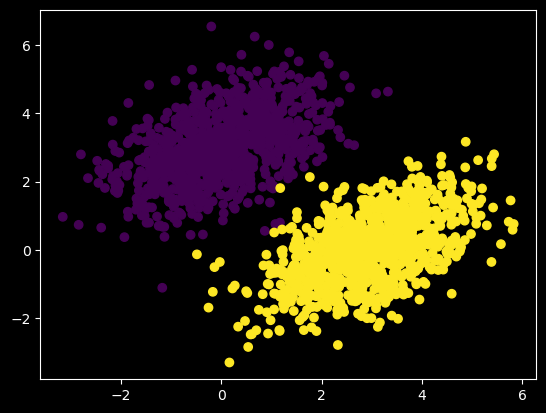

In [7]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [8]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))

b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-10 21:52:09.970571: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-10 21:52:09.973525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
def model(input):
    return tf.matmul(inputs, W) + b

In [16]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [17]:
learning_rate = 0.1


def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [18]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 1.3608
Loss at step 1: 0.2868
Loss at step 2: 0.1383
Loss at step 3: 0.1109
Loss at step 4: 0.1009
Loss at step 5: 0.0939
Loss at step 6: 0.0878
Loss at step 7: 0.0823
Loss at step 8: 0.0773
Loss at step 9: 0.0727
Loss at step 10: 0.0686
Loss at step 11: 0.0648
Loss at step 12: 0.0613
Loss at step 13: 0.0582
Loss at step 14: 0.0553
Loss at step 15: 0.0527
Loss at step 16: 0.0503
Loss at step 17: 0.0481
Loss at step 18: 0.0461
Loss at step 19: 0.0443
Loss at step 20: 0.0426
Loss at step 21: 0.0411
Loss at step 22: 0.0398
Loss at step 23: 0.0385
Loss at step 24: 0.0374
Loss at step 25: 0.0364
Loss at step 26: 0.0354
Loss at step 27: 0.0345
Loss at step 28: 0.0338
Loss at step 29: 0.0330
Loss at step 30: 0.0324
Loss at step 31: 0.0318
Loss at step 32: 0.0313
Loss at step 33: 0.0308
Loss at step 34: 0.0303
Loss at step 35: 0.0299
Loss at step 36: 0.0295
Loss at step 37: 0.0292
Loss at step 38: 0.0289
Loss at step 39: 0.0286


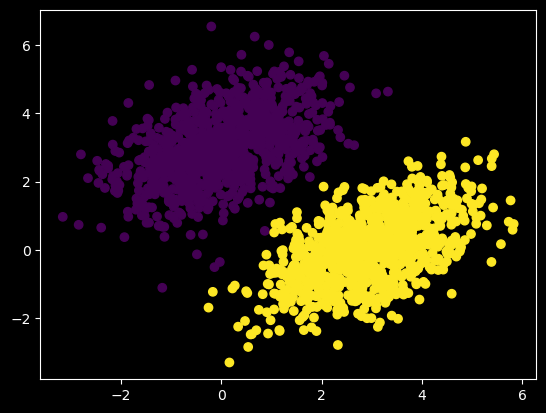

In [19]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

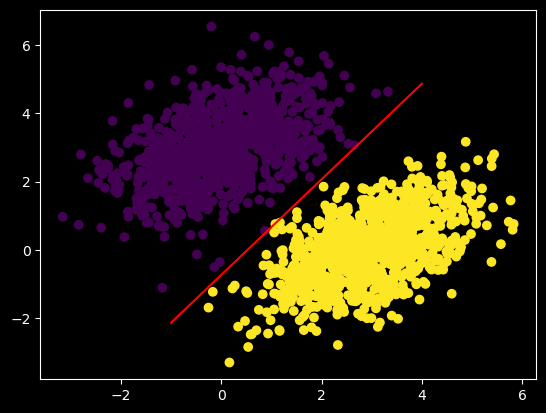

In [20]:
x = np.linspace(-1, 4, 100)

y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)